# __HEART DISEASE CAUSES: BIOMETRIC TRAITS OR LIFESTYLE FACTORS?__ 
<b>Author:</b> My Lan Nguyen
## 1. Introduction
Heart disease has long been a severe cause of death worldwide. According to CDC, every 33 seconds there is a person dying from cardiovascular disease. [1] The causes of heart disease can come from several factors, such as their genetic traits (age, sex), or as a result of their living habits (high cholesterol, high blood pressure, high-fat diet, lack of exercise,...). The question is, <i> which factor has a more significant effect on heart disease? </i> Or in other words, <i><b> Is heart disease most likely caused by biometric traits or lifestyle factors?<i></b>

In order to address the question above, we will explore a database on heart disease from <b>UCI Machine Learning Repository</b> [2], which was donated in 1988. It contains the medical data information of residents in four different regions: Cleveland, Hungary, Switzerland, and the VA Long Beach. The file was also roughly processed for public use. It has 78 attributes in total, but only 14 were published as follows:

- age
- sex
- cp: chest pain type
- trestbps: resting blood pressure
- chol: serum cholestoral
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels colored by flourosopy
- thal: blood flow to heart muscle
- num: diagnosis of heart disease. 

We will explore the processed dataset in Hungarian, as most of its variables are in double format rather than characters, which is better for using classification model. 


## 2. Preliminary exploratory data analysis

The database can be loaded in R normally with all necessary libraries installed. We will clean and wrangle our tibble by renaming column titles and filtering out all values (?) for later processing. As we are also only interested in whether a person has heart disease or not, the disease type classifications (0,1,2,3,4) in the final column <i>num</i> can be simplified into two single values: 1 (heart disease present) and 0 (heart disease absence). 

In [1]:
library (tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library (cowplot)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"

heart_hungarian <- read_csv (url, 
                             col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"), 
                             na = "?") |> 
    filter(trestbps != "?") |>
    filter(chol != "?") |>
    filter (thalach != "?") |>
    filter (fbs != "?") |> 
    filter (exang != "?")
heart_hungarian

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


<i>Table 1: The processed dataset of all patients in Hungary and their heart disease diagnosis (present or not)</i>

To evaluate the accuracy of our model, we need to summarize the origial dataset and see the actual percentage of heart disease presented. If our classifier yields a higher accuracy than the major percentage below (which is 63%), we can gain valuable information from our model prediction. 

In [3]:
heart_summarization <- heart_hungarian |> 
    group_by (num) |> 
    summarise (count = n(),
              percentage = n()/nrow(heart_hungarian)*100)
heart_summarization

num,count,percentage
<dbl>,<int>,<dbl>
0,163,62.21374
1,99,37.78626


<i>Table 2: A breakdown statistics of patients with and without heart disease</i>

This can also be visualized with the bar graph:

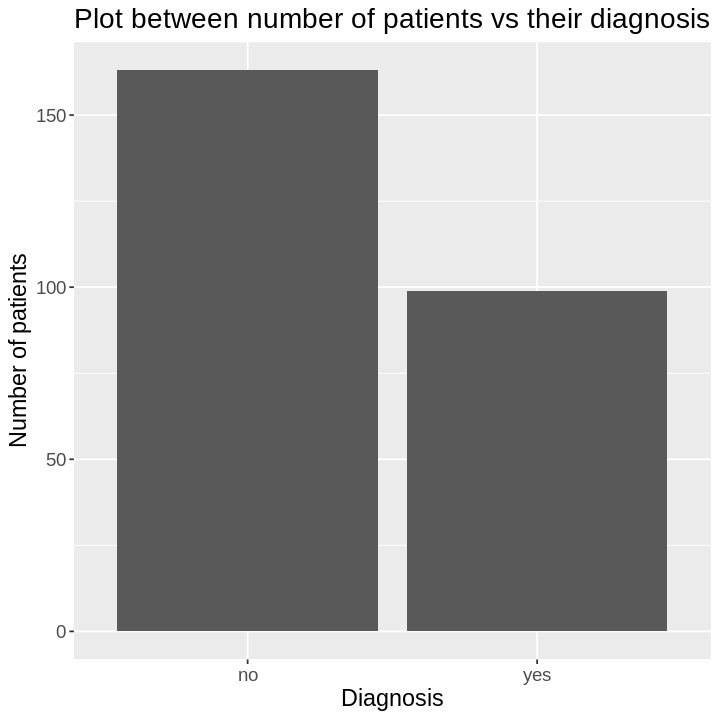

In [4]:
options (repr.plot.width = 6, repr.plot.height = 6)
heart_summarization_plot <- heart_summarization |> 
    ggplot (aes (x = c("no", "yes"), y = count)) +
    geom_bar (stat = "identity") +
    ggtitle ("Plot between number of patients vs their diagnosis") + 
    labs (x = "Diagnosis", y = "Number of patients") + 
    theme (text = element_text (size = 14)) 

heart_summarization_plot

<i>Figure 1: Plot between number of patients vs their diagnosis </i>

To answer our question, <i>is heart disease most likely caused by biometric traits or lifestyle factors?</i>, we will divide our data into two groups: biometric traits and lifestyle factors. Age and sex are possible candidates for geometric traits. Regarding lifestyle, we need to take a closer look at the remaining 12 columns. Examining all these 12 variables can be extremely time-consuming and ineffective, so we will only focus on the ones that are mostly the results of bad living habits. According to multiple research [3] [4], high blood pressure, cholesterol levels, blood sugar, heart rate, and exercise-induced angina are the major consequences of unhealthy lifestyles, which significantly contribute to the risk of heart disease. Therefore, we will consider 5 major variables: trestbps, chol, fbs, thalach, and exang. 

Our final group division is:
- Biometric traits: age and sex.
- Lifestyle factors: trestbps, chol, fbs, thalach, and exang.
- Heart disease diagnosis: num

In [5]:
heart_hungarian_reduced <- heart_hungarian |>  
    select (age, sex, trestbps, chol, fbs, thalach, exang, num) |> 
    mutate (num = as.factor (num)) 

heart_hungarian_reduced

age,sex,trestbps,chol,fbs,thalach,exang,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,1,130,132,0,185,0,0
29,1,120,243,0,160,0,0
30,0,170,237,0,170,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,155,342,1,150,1,1
58,0,180,393,0,110,1,1
65,1,130,275,0,115,1,1


<i>Table 3: The Hungarian dataset with relevant variable selections </i>

We plot the graphs between different variables in the lifestyle group to see if there are any particular trends or patterns.

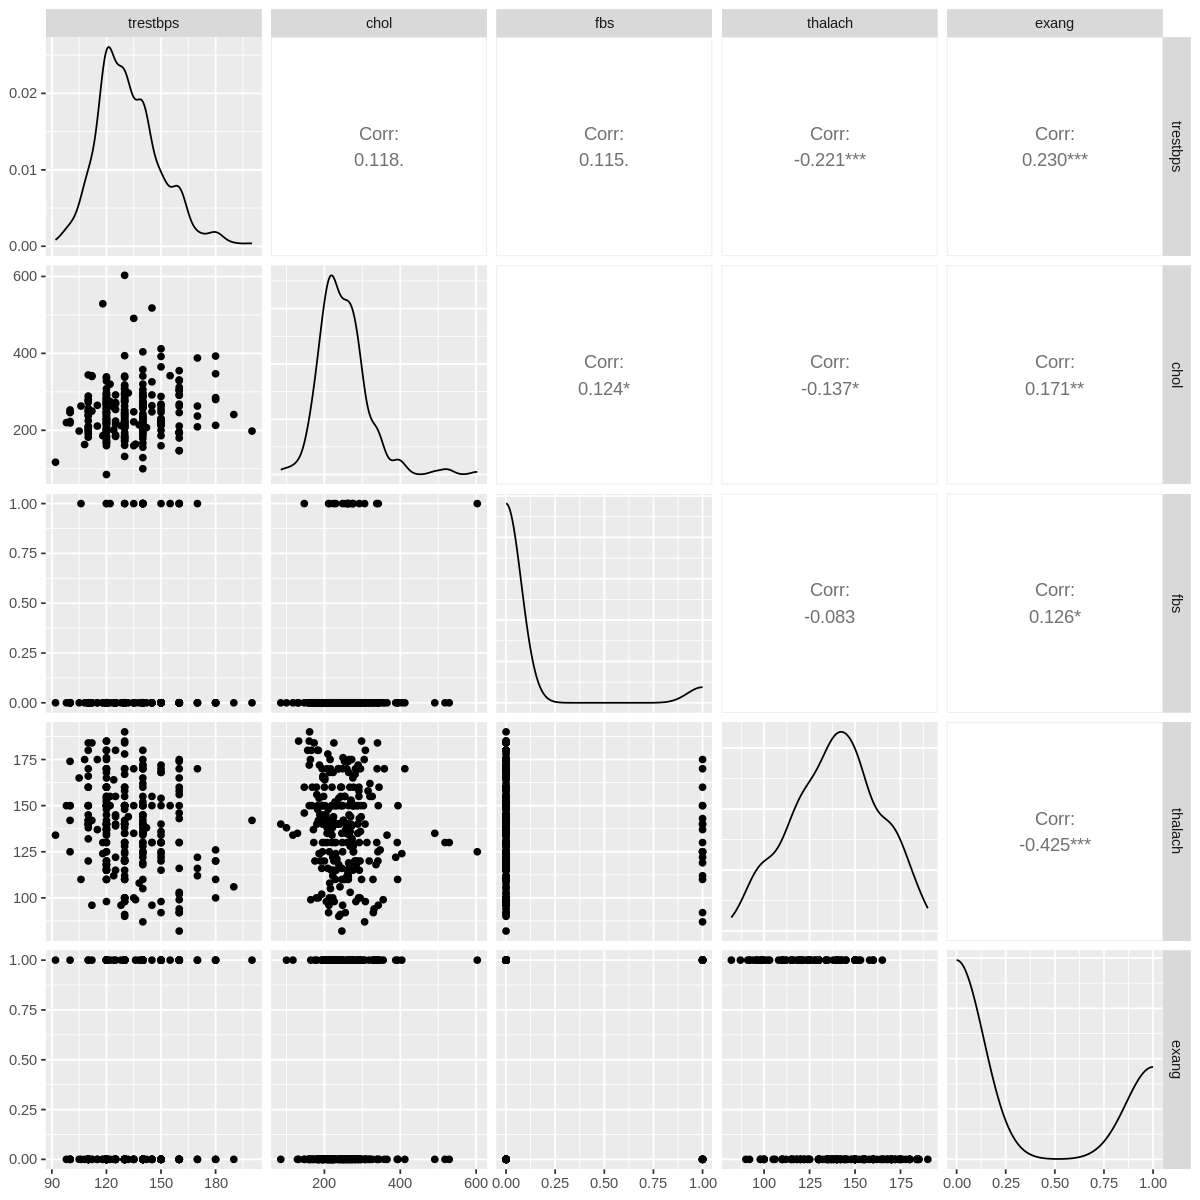

In [6]:
options (repr.plot.width = 10, repr.plot.height = 10)
plot_variables_focused <- heart_hungarian_reduced |> 
    select (trestbps:exang) |> 
    ggpairs (lower=list(combo=wrap("facethist",  
                     binwidth=5)))
plot_variables_focused

<i> Figure 2: The graphs between each variable couples </i>

As there are no significant correlations in each combination of these variables, we will proceed with all 5 variables as predictors for the lifestyle group. 

## 3. Methods

K-nearest neighbor classification is our main method to conduct this case study. It is highly effective in identifying the best predictors for heart disease. The accuracy of the model will be calculated based on the variables from two groups (biometric and lifestyle). The group with higher accuracy is synonymous with having better predictors, indicating that its variables are more decisive toward heart disease risks. 

To perform the k-nearest neighbor classification model, we need to first split the data into training and testing sets. The ratio can be adjusted based on different contexts. In this case, we will use the popular ratio 3:1. 

In [7]:
set.seed (1003)
# Split the heart hungarian data into training and testing data based on ratio 3:1.
heart_split <- initial_split(heart_hungarian_reduced, prop = 0.75, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Next, we tune the k value to maximize the accuracy, which can be reflected in the plot below.

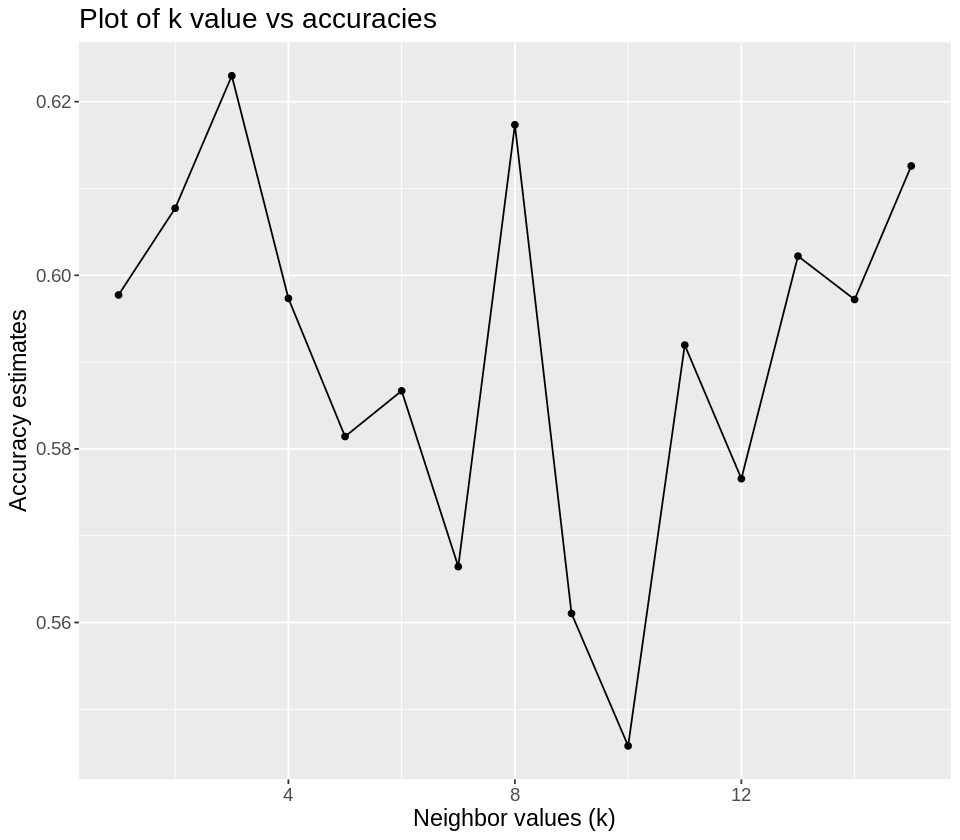

In [8]:
set.seed (1003)
options (repr.plot.width = 8, repr.plot.height = 7)

# Tuning k value for model.
biometric_spec <- nearest_neighbor (weight_func = "rectangular", neighbor = tune()) |> 
    set_engine ("kknn") |> 
    set_mode ("classification")

# Creating a normal recipe for the biometric trait group. 
biometric_recipe <- recipe (num ~ age + sex, data = heart_train) |> 
    step_center (all_predictors ()) |> 
    step_scale (all_predictors())

biometric_vfold <- vfold_cv (heart_train, v= 5, strata = num)

biometric_fit <- workflow () |> 
    add_model (biometric_spec) |> 
    add_recipe (biometric_recipe) |> 
    tune_grid (resamples = biometric_vfold, grid = tibble (neighbors = seq (from = 1, to = 15, by = 1))) 

# Evaluate the accuracy of the biometric model. 
biometric_accuracies <- biometric_fit |> 
    collect_metrics() |> 
    filter (.metric == "accuracy") |> 
    arrange (desc (mean))

# Plot the graph for k
biometric_k_plot <- ggplot (biometric_accuracies, aes (x = neighbors, y = mean)) + 
    geom_point () + 
    geom_line()+
    labs ( x= "Neighbor values (k)", y = "Accuracy estimates") + 
    ggtitle ("Plot of k value vs accuracies") + 
    theme (text = element_text (size = 14))

biometric_k_plot

<i> Figure 3: The plot of accuracy estimates vs k values in biometric group. </i>

As we can see from the graph above, k peaks at 3. We will tune k = 3 in this case and reapply it to our model.

In [9]:
options (repr.plot.width = 8, repr.plot.height = 8)
biometric_best_spec <- nearest_neighbor (weight_func = "rectangular", neighbor = 3) |> 
    set_engine ("kknn") |> 
    set_mode ("classification")

biometric_best_fit <- workflow () |> 
    add_model (biometric_best_spec) |> 
    add_recipe (biometric_recipe) |> 
    fit (heart_train)

# Apply the trained model to our testing data. 
biometric_prediction <- predict (biometric_best_fit, heart_test) |> 
    bind_cols (heart_test) |> 
    metrics (truth = num, estimate = .pred_class) |> 
    filter (.metric == "accuracy") |> 
    pull(.estimate)
biometric_prediction

[1] 0.6363636

The accuracy of the classification model with biometric factors is pretty low, meaning that <i>age</i> and <i>sex</i> are not the best predictors in detecting heart disease.
We will try the same process again with the lifestyle factors group.

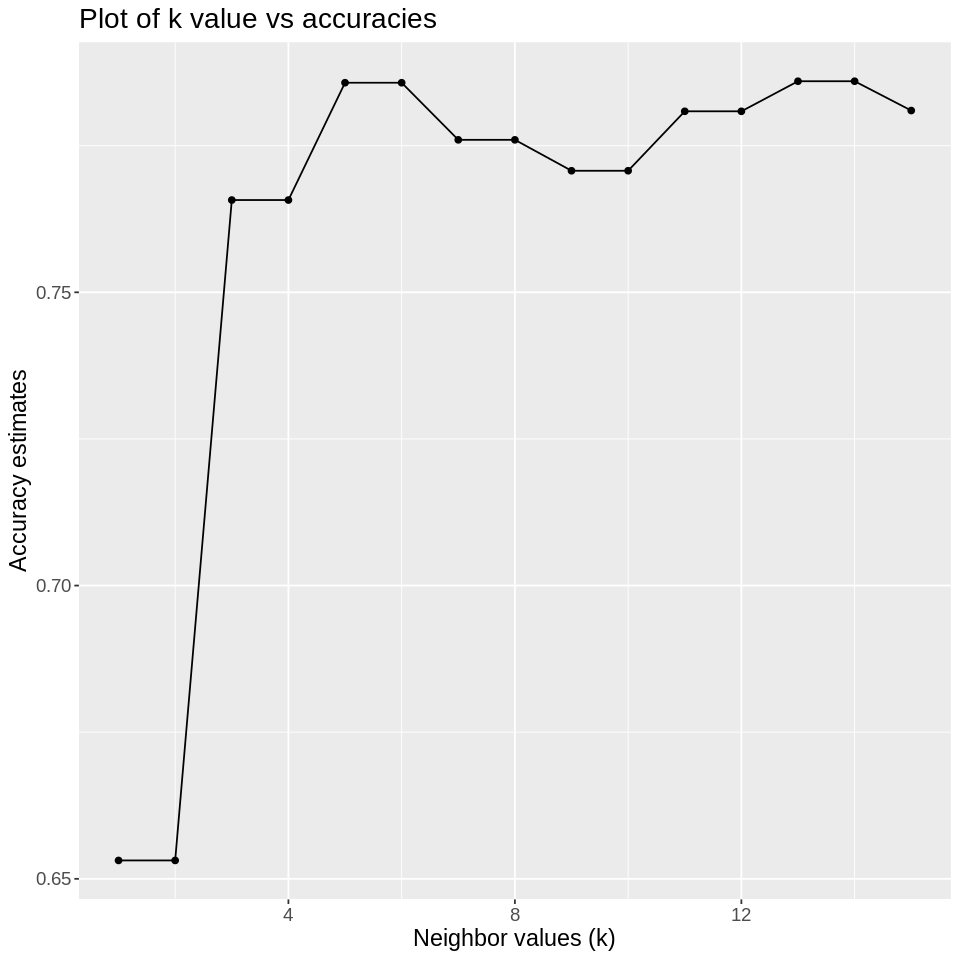

In [10]:
set.seed (1003)

options (repr.plot.width = 8, repr.plot.height = 8)

# Tuning k value for model.
lifestyle_spec <- nearest_neighbor (weight_func = "rectangular", neighbor = tune()) |> 
    set_engine ("kknn") |> 
    set_mode ("classification")

# Creating a normal recipe for the lifestyle trait group. 
lifestyle_recipe <- recipe (num ~ exang + chol + thalach + trestbps + fbs, data = heart_train) |> 
    step_center (all_predictors ()) |> 
    step_scale (all_predictors())

lifestyle_vfold <- vfold_cv (heart_train, v= 5, strata = num)

lifestyle_fit <- workflow () |> 
    add_model (lifestyle_spec) |> 
    add_recipe (lifestyle_recipe) |> 
    tune_grid (resamples = lifestyle_vfold, grid = tibble (neighbors = seq (from = 1, to = 15, by = 1))) 

# Evaluate the accuracy of the biometric model. 
lifestyle_accuracies <- lifestyle_fit |> 
    collect_metrics() |> 
    filter (.metric == "accuracy") |> 
    arrange (desc (mean))

# Plot the graph for k
lifestyle_k_plot <- ggplot (lifestyle_accuracies, aes (x = neighbors, y = mean)) + 
    geom_point () + 
    geom_line()+
    labs ( x= "Neighbor values (k)", y = "Accuracy estimates") + 
    ggtitle ("Plot of k value vs accuracies") + 
    theme (text = element_text (size = 14))

lifestyle_k_plot

<i> Figure 4: The plot of accuracy estimates vs k values in lifestyle group. </i>

In [11]:
options (repr.plot.width = 8, repr.plot.height = 8)

k_max <- lifestyle_accuracies |> 
    slice (1) |> 
    pull (neighbors)

lifestyle_best_spec <- nearest_neighbor (weight_func = "rectangular", neighbor = k_max) |> 
    set_engine ("kknn") |> 
    set_mode ("classification")

lifestyle_best_fit <- workflow () |> 
    add_model (lifestyle_best_spec) |> 
    add_recipe (lifestyle_recipe) |> 
    fit (heart_train)

lifestyle_prediction <- predict (lifestyle_best_fit, heart_test) |> 
    bind_cols (heart_test) |> 
    metrics (truth = num, estimate = .pred_class) |> 
    filter (.metric == "accuracy") |> 
    pull(.estimate)
lifestyle_prediction

[1] 0.8181818

As a result, the lifestyle group has a significantly higher accuracy (0.82) than the biometric group (0.63).

## 4. Results & Discussion
Based on the calculations above, the accuracy for lifestyle factors is much higher than that for biometric traits, meaning that living habits play a significant role in reducing heart disease risks compared to genetic characteristics. This result could weaken some common misconceptions about biometrics, such as older people tend to have higher risks of heart problems. Heart disease can happen to anyone regardless of their gender, age, or nationality. The major cause of cardiovascular problems, based on the result above, is the living habits such as high blood pressure, cholesterol, blood sugar, heart rate, and exercise induced angina. These are the consequences of an unhealthy diet (too much fat and sugar) and sedentary lifestyle.

The result is also what we expected, because there is a dominant number of studies pointing out that a highly-fat diet and sedantary lifestyle are the major causes of heart disease. There are also some articles on the effect of age and sex, but they are not the major cause. With this information, physicians can give advice on building a healthier diet for patients with potential heart diseases. It is also helpful for normal people, as they can adjust their living habits at an early stage to reduce the risk of cardiovascular diseases. 

This case study can provide some future questions:
- Among 5 variables resulting from lifestyle habits, which combinations are the most dominant in contributing to heart disease risk?
- How are the remaining variables associated with heart disease?
- Are biometric traits and lifestyle factors both contributing to heart disease?

In conclusion, although heart disease can be the consequence of both genetics and living habits, our model shows that the latter is more significant and should be monitored properly to reduce the risk of diseases. 

## Reference links:
[1]: Dipannita. A., Shanto. B., Redoy. R., Hana. S., (2022). https://doi.org/10.7759/cureus.30119

[2]: Janosi. A., Steinbrunn. W., Pfisterer. M., Detrano. R., (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

[3]: García-Ordás, M.T., Bayón-Gutiérrez, M., Benavides, C. et al. (2023). Heart disease risk prediction using deep learning techniques with feature augmentation. Multimed Tools Appl 82, 31759–31773. https://doi.org/10.1007/s11042-023-14817-z

[4]: MPH, James. Y., MD. (2019). Lifestyle changes to lower heart disease risk. Harvard Health. https://www.health.harvard.edu/blog/lifestyle-changes-to-lower-heart-disease-risk-2019110218125